In [1]:
import sys
from os import path
print(path.dirname( path.dirname( path.abspath("__file__") ) ))
sys.path.append(path.dirname( path.dirname( path.abspath("__file__") ) ))

import matplotlib.pyplot as plt 
from Invester.MarketDB import MarketDB


/Volumes/DATA/Code/Daily_Coding/stock_analysis


In [2]:
mk = MarketDB()

/Users/hongjinseog/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [14]:
df = mk.get_daily_price('현대백화점', '2000-01-01')

df['MA20'] = df.close.rolling(window=20).mean()
df['stddev'] = df.close.rolling(window=20).std()
df['upper'] = df.MA20 + (df.stddev * 2)
df['lower'] = df.MA20 - (df.stddev * 2)
df['PB'] = (df.close - df.lower) / (df.upper - df.lower)




End Date is Initialized to '2022-08-29'


/Users/hongjinseog/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [15]:
df['II'] = (2 * df.close - df.high - df.low) / (df.high - df.low) * df.volume
df['IIP21'] = df.II.rolling(window=21).sum() / df.volume.rolling(window=21).sum() * 100
df = df.dropna()


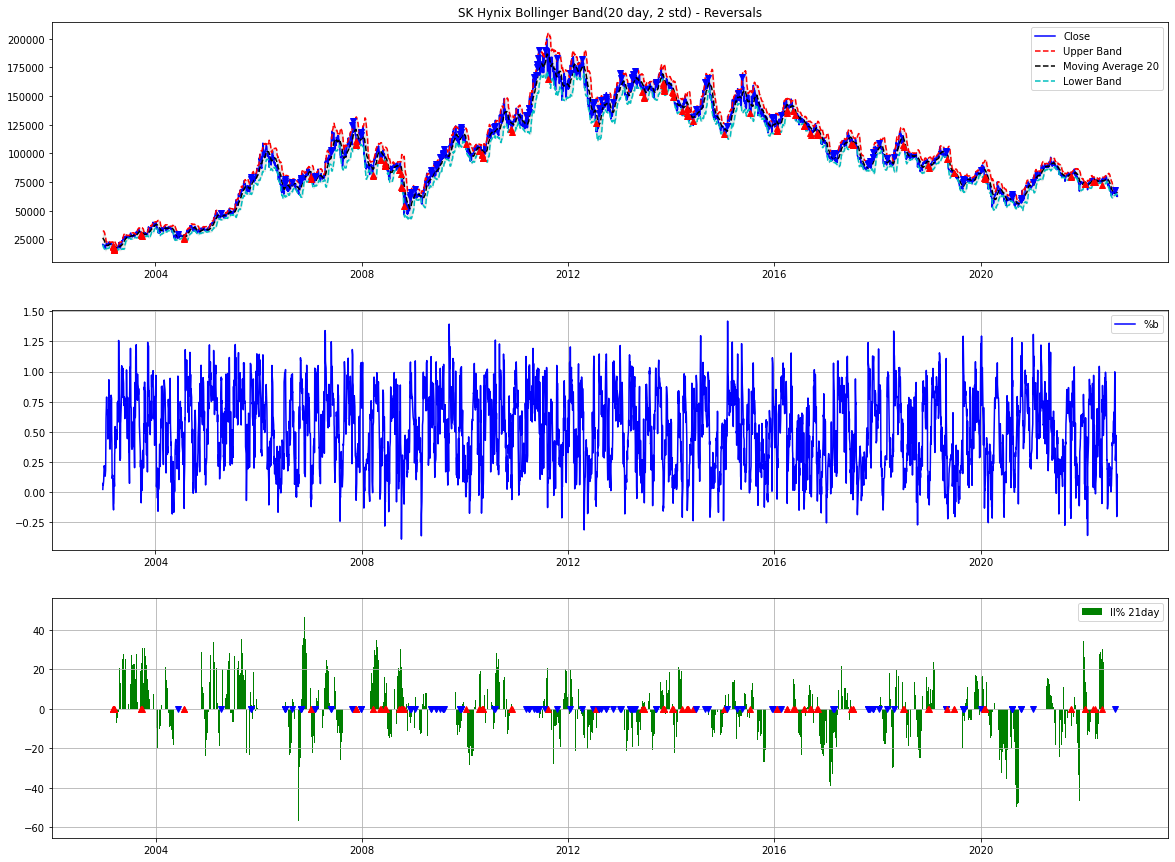

In [16]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
plt.title('SK Hynix Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df.close, 'b', label='Close')
plt.plot(df.index, df.upper, 'r--', label='Upper Band')
plt.plot(df.index, df.MA20, 'k--', label='Moving Average 20')
plt.plot(df.index, df.lower, 'c--', label='Lower Band')
plt.fill_between(df.index, df.upper, df.lower, color='0.9')
for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], df.close.values[i], 'bv')

plt.legend(loc='best')



plt.subplot(3, 1, 2)
plt.plot(df.index, df.PB, 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')


plt.subplot(3, 1, 3)
plt.bar(df.index, df.IIP21, color='g', label='II% 21day')
for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show()